In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import time
import datetime
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Imputer, OneHotEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

from hyperopt import Trials, STATUS_OK, tpe
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.callbacks import Callback

from hyperas import optim
from hyperas.distributions import choice, uniform, conditional

np.random.seed(20171212)

Using TensorFlow backend.


In [56]:
path = '../datasource/APP埋点信用/%s'

In [ ]:
df = pd.read_csv(path%'total_app_var.csv', index_col=0)

In [ ]:
list (df.columns)

In [ ]:
before_sumbit_df = df.loc[:,df.columns[df.columns.str.endswith('_7') | df.columns.str.endswith('_30') | df.columns.str.endswith('_07')
                   |df.columns.str.endswith('_15')|df.columns.str.endswith('_30')|df.columns.str.endswith('_60')
                   |df.columns.str.endswith('_90')|df.columns.str.endswith('flag')]]

In [ ]:
before_sumbit_df.to_csv(path%'total_app_var_before.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

In [ ]:
to_be_scala = before_sumbit_df.iloc[:, :-1 ].values
Y = before_sumbit_df['flag']

In [ ]:
X = st.fit_transform(to_be_scala)

In [ ]:
X.shape

In [ ]:
np.save(path%'x_before',X)

In [ ]:
xx = np.load(path%'x.npz.npy')

In [ ]:
xx.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20171214)

In [2]:
def data():
    path = '../datasource/APP埋点信用/%s'
    X = np.load(path%'x_before.npy')
    Y = np.load(path%'y_before.npy')
    print (X.shape)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20171214)
    return x_train, y_train, x_test, y_test

In [3]:
def create_model(x_train, y_train, x_test, y_test):
    
    model = Sequential()
    model.add(Dense(256, input_shape=(174,)))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0,1)}}))
    model.add(Dense({{choice([256,512,1024])}}))
    model.add(Dropout({{uniform(0,1)}}))
    model.add(Dense({{choice([256,512,1024])}}))
    model.add(Dropout({{uniform(0,1)}}))
    
    # if we choose 'four', we add an additional foutth layer
    if conditional({{choice(['three', 'four'])}}) == 'four':
        model.add(Dense(100))
        model.add({{choice([Dropout(0.5), Activation('linear')])}})
        model.add(Activation('relu'))
    
    # 输出层
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    print (model.summary())
    
    model.compile(
        loss='binary_crossentropy', 
        metrics=['accuracy'],
        optimizer='sgd')
    
    model.fit(x_train, y_train, batch_size={{choice([64,128,256,512,1024,2048])}},epochs=10, verbose=2, validation_data=(x_test, y_test))
    score, acc = model.evaluate(x_test, y_test, verbose=0)
    print ('Test acc:', acc)
    return {'loss': score, 'status': STATUS_OK, 'model':model}

In [5]:
def run():
    best_run, best_model = optim.minimize(model=create_model,
                                         data=data,
                                         algo=tpe.suggest,
                                         max_evals=20,
                                         trials=Trials(),
                                         notebook_name='模型')
    X_train, Y_train, X_test, Y_test = data()
    print (best_model.evaluate(X_test, Y_test))
    print (best_run)
    return best_run, best_model

In [6]:
best_run, best_model = run()

>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import time
except:
    pass

try:
    import datetime
except:
    pass

try:
    from matplotlib import pyplot as plt
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from sklearn.preprocessing import StandardScaler, Imputer, OneHotEncoder
except:
    pass

try:
    from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras.datasets import mnist
except:
    pass

try:
    from keras.layers.core import Dense, Dropout, Activation
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from keras.utils.np_utils import to_categorical
except

1s - loss: 1.2169 - acc: 0.7509 - val_loss: 1.1919 - val_acc: 0.8074
Test acc: 0.80743994361
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               44800     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              263168    
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________

3s - loss: 0.4191 - acc: 0.8238 - val_loss: 0.4287 - val_acc: 0.8193
Epoch 9/10
3s - loss: 0.4146 - acc: 0.8245 - val_loss: 0.4260 - val_acc: 0.8192
Epoch 10/10
3s - loss: 0.4138 - acc: 0.8263 - val_loss: 0.4243 - val_acc: 0.8205
Test acc: 0.820508649212
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               44800     
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
___________________

Train on 27661 samples, validate on 18441 samples
Epoch 1/10
1s - loss: 0.6117 - acc: 0.7222 - val_loss: 0.4511 - val_acc: 0.8125
Epoch 2/10
1s - loss: 0.5300 - acc: 0.7738 - val_loss: 0.4411 - val_acc: 0.8150
Epoch 3/10
1s - loss: 0.5119 - acc: 0.7854 - val_loss: 0.4367 - val_acc: 0.8165
Epoch 4/10
1s - loss: 0.4999 - acc: 0.7915 - val_loss: 0.4368 - val_acc: 0.8163
Epoch 5/10
1s - loss: 0.4920 - acc: 0.7955 - val_loss: 0.4366 - val_acc: 0.8175
Epoch 6/10
1s - loss: 0.4834 - acc: 0.7994 - val_loss: 0.4310 - val_acc: 0.8186
Epoch 7/10
1s - loss: 0.4821 - acc: 0.8030 - val_loss: 0.4315 - val_acc: 0.8185
Epoch 8/10
1s - loss: 0.4728 - acc: 0.8018 - val_loss: 0.4271 - val_acc: 0.8184
Epoch 9/10
1s - loss: 0.4723 - acc: 0.8030 - val_loss: 0.4264 - val_acc: 0.8186
Epoch 10/10
1s - loss: 0.4684 - acc: 0.8046 - val_loss: 0.4250 - val_acc: 0.8197
Test acc: 0.819695244302
_________________________________________________________________
Layer (type)                 Output Shape              Par

Train on 27661 samples, validate on 18441 samples
Epoch 1/10
2s - loss: 0.6014 - acc: 0.7009 - val_loss: 0.4980 - val_acc: 0.7990
Epoch 2/10
2s - loss: 0.5189 - acc: 0.7778 - val_loss: 0.4636 - val_acc: 0.8079
Epoch 3/10
2s - loss: 0.4917 - acc: 0.7936 - val_loss: 0.4499 - val_acc: 0.8121
Epoch 4/10
2s - loss: 0.4772 - acc: 0.7998 - val_loss: 0.4439 - val_acc: 0.8145
Epoch 5/10
2s - loss: 0.4705 - acc: 0.8043 - val_loss: 0.4396 - val_acc: 0.8151
Epoch 6/10
2s - loss: 0.4633 - acc: 0.8092 - val_loss: 0.4385 - val_acc: 0.8170
Epoch 7/10
2s - loss: 0.4579 - acc: 0.8111 - val_loss: 0.4345 - val_acc: 0.8180
Epoch 8/10
2s - loss: 0.4562 - acc: 0.8119 - val_loss: 0.4330 - val_acc: 0.8186
Epoch 9/10
2s - loss: 0.4459 - acc: 0.8140 - val_loss: 0.4303 - val_acc: 0.8183
Epoch 10/10
2s - loss: 0.4458 - acc: 0.8163 - val_loss: 0.4285 - val_acc: 0.8185
Test acc: 0.818502250427
_________________________________________________________________
Layer (type)                 Output Shape              Par

4s - loss: 0.4551 - acc: 0.8110 - val_loss: 0.4239 - val_acc: 0.8188
Epoch 4/10
4s - loss: 0.4441 - acc: 0.8178 - val_loss: 0.4208 - val_acc: 0.8197
Epoch 5/10
4s - loss: 0.4337 - acc: 0.8187 - val_loss: 0.4189 - val_acc: 0.8197
Epoch 6/10
4s - loss: 0.4308 - acc: 0.8213 - val_loss: 0.4178 - val_acc: 0.8200
Epoch 7/10
4s - loss: 0.4301 - acc: 0.8230 - val_loss: 0.4161 - val_acc: 0.8210
Epoch 8/10
4s - loss: 0.4257 - acc: 0.8243 - val_loss: 0.4163 - val_acc: 0.8219
Epoch 9/10
4s - loss: 0.4245 - acc: 0.8259 - val_loss: 0.4145 - val_acc: 0.8238
Epoch 10/10
4s - loss: 0.4191 - acc: 0.8261 - val_loss: 0.4133 - val_acc: 0.8234
Test acc: 0.823382679905
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 256)               44800     
_________________________________________________________________
activation_42 (Activation)   (None, 256)               0         
_______________

3s - loss: 0.5285 - acc: 0.7678 - val_loss: 0.4357 - val_acc: 0.8155
Epoch 2/10
2s - loss: 0.4636 - acc: 0.8097 - val_loss: 0.4262 - val_acc: 0.8206
Epoch 3/10
2s - loss: 0.4467 - acc: 0.8149 - val_loss: 0.4206 - val_acc: 0.8214
Epoch 4/10
2s - loss: 0.4371 - acc: 0.8178 - val_loss: 0.4180 - val_acc: 0.8225
Epoch 5/10
3s - loss: 0.4283 - acc: 0.8221 - val_loss: 0.4158 - val_acc: 0.8225
Epoch 6/10
3s - loss: 0.4200 - acc: 0.8255 - val_loss: 0.4136 - val_acc: 0.8237
Epoch 7/10
3s - loss: 0.4188 - acc: 0.8250 - val_loss: 0.4130 - val_acc: 0.8245
Epoch 8/10
2s - loss: 0.4165 - acc: 0.8256 - val_loss: 0.4137 - val_acc: 0.8239
Epoch 9/10
2s - loss: 0.4127 - acc: 0.8273 - val_loss: 0.4110 - val_acc: 0.8251
Epoch 10/10
2s - loss: 0.4077 - acc: 0.8289 - val_loss: 0.4095 - val_acc: 0.8250
Test acc: 0.824955262736
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 256)             

In [7]:
# 用进件钱数据
best_run

{'Dense': 2,
 'Dense_1': 2,
 'Dropout': 0.38757827904833575,
 'Dropout_1': 0.36117159829314394,
 'Dropout_2': 0.3640245915268092,
 'add': 0,
 'batch_size': 0,
 'conditional': 0}

In [8]:
# 确定参数后，调整epochs个数
# x_train, y_train, x_test, y_test = data()
model = Sequential()
model.add(Dense(256, input_shape=(174,)))
model.add(Activation('relu'))
model.add(Dropout(0.388))
model.add(Dense(1024))
model.add(Dropout(0.361))
model.add(Dense(1024))
model.add(Dropout(0.364))
model.add(Activation('relu'))

# 输出层
model.add(Dense(1))
model.add(Activation('sigmoid'))
print (model.summary())


# batch_size = 64

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 256)               44800     
_________________________________________________________________
activation_57 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_95 (Dense)             (None, 1024)              263168    
_________________________________________________________________
dropout_65 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_96 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_66 (Dropout)         (None, 1024)              0         
__________

In [40]:
import keras_tunning_lr as tlr
import importlib
importlib.reload(tlr)

<module 'keras_tunning_lr' from '/tmp/working/app埋点信用/keras_tunning_lr.py'>

In [14]:
x_train, y_train, x_test, y_test = data()

(46102, 174)


In [15]:
data_set = [x_train, x_test, y_train, y_test]

In [41]:
tunning_lr = tlr.LR_Tunning(model, batch_size=64, epochs=20, dataSet=data_set)

Train on 27661 samples, validate on 18441 samples
Epoch 1/20
7s - loss: 0.7270 - acc: 0.7936 - val_loss: 1.3410 - val_acc: 0.8025
Epoch 2/20
6s - loss: 2.2843 - acc: 0.7781 - val_loss: 2.8707 - val_acc: 0.7939
Epoch 3/20
6s - loss: 2.5666 - acc: 0.8054 - val_loss: 3.1947 - val_acc: 0.7918
Epoch 4/20
6s - loss: 3.0982 - acc: 0.8042 - val_loss: 3.0949 - val_acc: 0.8060
Epoch 5/20
6s - loss: 3.0140 - acc: 0.8114 - val_loss: 3.1012 - val_acc: 0.8061
Epoch 6/20
6s - loss: 3.4303 - acc: 0.7851 - val_loss: 3.1056 - val_acc: 0.8060
Epoch 7/20
6s - loss: 3.3498 - acc: 0.7909 - val_loss: 3.5402 - val_acc: 0.7788
Epoch 8/20
6s - loss: 3.0534 - acc: 0.8092 - val_loss: 3.0697 - val_acc: 0.8082
Epoch 9/20
6s - loss: 2.9837 - acc: 0.8136 - val_loss: 3.0707 - val_acc: 0.8081
Epoch 10/20
6s - loss: 3.0065 - acc: 0.8120 - val_loss: 3.1378 - val_acc: 0.8041
Epoch 11/20
6s - loss: 3.0355 - acc: 0.8105 - val_loss: 3.1384 - val_acc: 0.8040
Epoch 12/20
6s - loss: 4.1957 - acc: 0.7388 - val_loss: 3.3819 - val

7s - loss: 0.3854 - acc: 0.8432 - val_loss: 0.4047 - val_acc: 0.8327
Train on 27661 samples, validate on 18441 samples
Epoch 1/20
10s - loss: 0.4385 - acc: 0.8202 - val_loss: 0.4142 - val_acc: 0.8239
Epoch 2/20
9s - loss: 0.4129 - acc: 0.8293 - val_loss: 0.4216 - val_acc: 0.8241
Epoch 3/20
9s - loss: 0.4032 - acc: 0.8323 - val_loss: 0.4076 - val_acc: 0.8279
Epoch 4/20
9s - loss: 0.3960 - acc: 0.8356 - val_loss: 0.4098 - val_acc: 0.8249
Epoch 5/20
9s - loss: 0.3910 - acc: 0.8381 - val_loss: 0.4023 - val_acc: 0.8276
Epoch 6/20
9s - loss: 0.3869 - acc: 0.8371 - val_loss: 0.4022 - val_acc: 0.8276
Epoch 7/20
9s - loss: 0.3894 - acc: 0.8396 - val_loss: 0.4006 - val_acc: 0.8308
Epoch 8/20
9s - loss: 0.3852 - acc: 0.8408 - val_loss: 0.3953 - val_acc: 0.8303
Epoch 9/20
9s - loss: 0.3829 - acc: 0.8402 - val_loss: 0.4036 - val_acc: 0.8287
Epoch 10/20
9s - loss: 0.3800 - acc: 0.8413 - val_loss: 0.3975 - val_acc: 0.8295
Epoch 11/20
9s - loss: 0.3772 - acc: 0.8420 - val_loss: 0.4001 - val_acc: 0.830

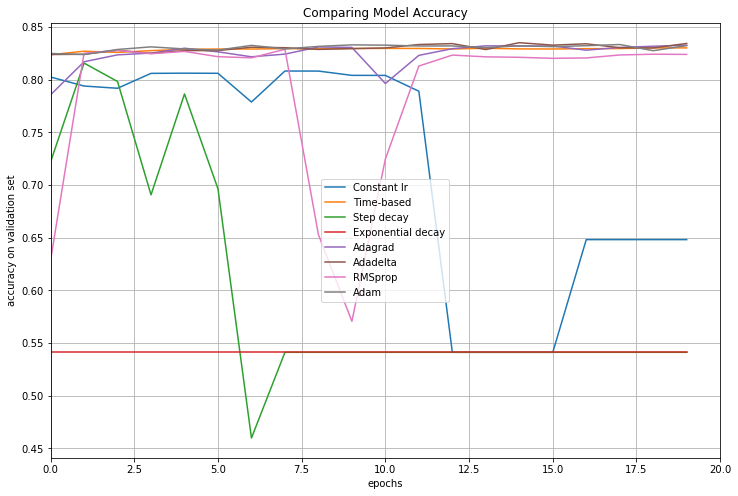

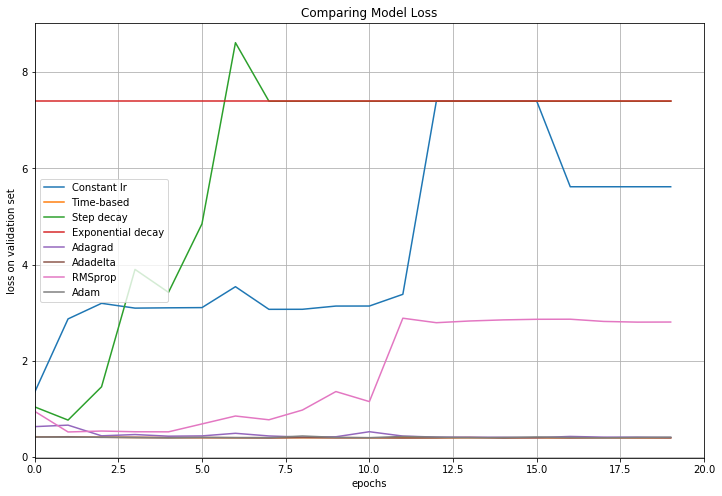

In [42]:
tunning_lr.run()

In [43]:
import keras_metrics as km

In [44]:
metrics = km.Metrics()

In [47]:
from keras.optimizers import Adadelta

In [48]:
# we get the best model:

model.compile(loss='binary_crossentropy',
					  optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0),
					  metrics=['accuracy'])
history_adadelta = model.fit(x_train, y_train, 
                     validation_data=(x_test, y_test), 
                     epochs=20, 
                     batch_size=64,
                     verbose=2,callbacks=[metrics])

Train on 27661 samples, validate on 18441 samples
Epoch 1/20
- val_f1: 0.818711 - val_precision: 0.785180 - val_recall 0.855235
12s - loss: 0.4372 - acc: 0.8176 - val_loss: 0.4128 - val_acc: 0.8262
Epoch 2/20
- val_f1: 0.820539 - val_precision: 0.789152 - val_recall 0.854526
11s - loss: 0.4104 - acc: 0.8297 - val_loss: 0.4072 - val_acc: 0.8285
Epoch 3/20
- val_f1: 0.822105 - val_precision: 0.775542 - val_recall 0.874616
11s - loss: 0.3994 - acc: 0.8332 - val_loss: 0.4102 - val_acc: 0.8263
Epoch 4/20
- val_f1: 0.820553 - val_precision: 0.784107 - val_recall 0.860553
11s - loss: 0.3954 - acc: 0.8354 - val_loss: 0.4017 - val_acc: 0.8273
Epoch 5/20
- val_f1: 0.824556 - val_precision: 0.782470 - val_recall 0.871425
11s - loss: 0.3929 - acc: 0.8366 - val_loss: 0.4153 - val_acc: 0.8298
Epoch 6/20
- val_f1: 0.824464 - val_precision: 0.782974 - val_recall 0.870598
11s - loss: 0.3885 - acc: 0.8381 - val_loss: 0.4012 - val_acc: 0.8299
Epoch 7/20
- val_f1: 0.813086 - val_precision: 0.811125 - val_

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
plt.plot(his.history['acc'])
plt.plot(his.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
# 另一个版本的model

{'Dense': 0,
 'Dense_1': 1,
 'Dropout': 0.2283813112902432,
 'Dropout_1': 0.5422412690636627,
 'Dropout_2': 0.33351393608141355,
 'add': 1,
 'batch_size': 0,
 'conditional': 1,
 'optimizer': 3}


# 确定参数后，调整epochs个数
x_train, y_train, x_test, y_test = data()
model = Sequential()
model.add(Dense(256, input_shape=(311,)))
model.add(Activation('relu'))
model.add(Dropout(0.422))
model.add(Dense(256))
model.add(Dropout(0.329))

model.add(Dropout(0.5))
model.add(Activation('relu'))

# 输出层
model.add(Dense(1))
model.add(Activation('sigmoid'))
print (model.summary())

model.compile(
    loss='binary_crossentropy', 
    metrics=['accuracy'],
    optimizer='rmsprop')

his = model.fit(x_train, y_train, batch_size=64,epochs=200, verbose=2, validation_data=(x_test, y_test))
# score, acc = model.evaluate(x_test, y_test, verbose=0)

In [49]:
import lightgbm as lgb

In [50]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

In [51]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 5,
    'max_depth': 6,
    'min_data_in_leaf': 450,
    'learning_rate': 0.1,
    'feature_fraction':0.9,
    'bagging_fraction':0.95,
    'bagging_freq':5,
    'lambda_l1':1,
    'lambda_l2':0.001,
    'min_gain_to_split':0.2,
    'verbose':2,
    'is_unbalance': False
}


In [52]:
gbm = lgb.train(params,
               lgb_train,
               num_boost_round=10000,
               valid_sets=lgb_eval,
               early_stopping_rounds=500)

[1]	valid_0's binary_logloss: 0.65101	valid_0's auc: 0.858713
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's binary_logloss: 0.61619	valid_0's auc: 0.86708
[3]	valid_0's binary_logloss: 0.587686	valid_0's auc: 0.866309
[4]	valid_0's binary_logloss: 0.563889	valid_0's auc: 0.872553
[5]	valid_0's binary_logloss: 0.543974	valid_0's auc: 0.875199
[6]	valid_0's binary_logloss: 0.526913	valid_0's auc: 0.87608
[7]	valid_0's binary_logloss: 0.512376	valid_0's auc: 0.881666
[8]	valid_0's binary_logloss: 0.499877	valid_0's auc: 0.883065
[9]	valid_0's binary_logloss: 0.489199	valid_0's auc: 0.88349
[10]	valid_0's binary_logloss: 0.479978	valid_0's auc: 0.883352
[11]	valid_0's binary_logloss: 0.47216	valid_0's auc: 0.884855
[12]	valid_0's binary_logloss: 0.465136	valid_0's auc: 0.886661
[13]	valid_0's binary_logloss: 0.459098	valid_0's auc: 0.887461
[14]	valid_0's binary_logloss: 0.453447	valid_0's auc: 0.88721
[15]	valid_0's binary_logloss: 0.448344	valid_0's auc: 0.

[157]	valid_0's binary_logloss: 0.38207	valid_0's auc: 0.906658
[158]	valid_0's binary_logloss: 0.382025	valid_0's auc: 0.906681
[159]	valid_0's binary_logloss: 0.381928	valid_0's auc: 0.906721
[160]	valid_0's binary_logloss: 0.381892	valid_0's auc: 0.906735
[161]	valid_0's binary_logloss: 0.381823	valid_0's auc: 0.906752
[162]	valid_0's binary_logloss: 0.381761	valid_0's auc: 0.906777
[163]	valid_0's binary_logloss: 0.381716	valid_0's auc: 0.906784
[164]	valid_0's binary_logloss: 0.381624	valid_0's auc: 0.90682
[165]	valid_0's binary_logloss: 0.381615	valid_0's auc: 0.906832
[166]	valid_0's binary_logloss: 0.381597	valid_0's auc: 0.906836
[167]	valid_0's binary_logloss: 0.381541	valid_0's auc: 0.906858
[168]	valid_0's binary_logloss: 0.381423	valid_0's auc: 0.906914
[169]	valid_0's binary_logloss: 0.381361	valid_0's auc: 0.906941
[170]	valid_0's binary_logloss: 0.38129	valid_0's auc: 0.906978
[171]	valid_0's binary_logloss: 0.381304	valid_0's auc: 0.906994
[172]	valid_0's binary_loglo

[325]	valid_0's binary_logloss: 0.376232	valid_0's auc: 0.909475
[326]	valid_0's binary_logloss: 0.376231	valid_0's auc: 0.909477
[327]	valid_0's binary_logloss: 0.376243	valid_0's auc: 0.90947
[328]	valid_0's binary_logloss: 0.376223	valid_0's auc: 0.909471
[329]	valid_0's binary_logloss: 0.376232	valid_0's auc: 0.909456
[330]	valid_0's binary_logloss: 0.376242	valid_0's auc: 0.909447
[331]	valid_0's binary_logloss: 0.376198	valid_0's auc: 0.909463
[332]	valid_0's binary_logloss: 0.376239	valid_0's auc: 0.909448
[333]	valid_0's binary_logloss: 0.376202	valid_0's auc: 0.909465
[334]	valid_0's binary_logloss: 0.376137	valid_0's auc: 0.909492
[335]	valid_0's binary_logloss: 0.376104	valid_0's auc: 0.909499
[336]	valid_0's binary_logloss: 0.376049	valid_0's auc: 0.909529
[337]	valid_0's binary_logloss: 0.376035	valid_0's auc: 0.909539
[338]	valid_0's binary_logloss: 0.376026	valid_0's auc: 0.909542
[339]	valid_0's binary_logloss: 0.375945	valid_0's auc: 0.909586
[340]	valid_0's binary_log

[484]	valid_0's binary_logloss: 0.374452	valid_0's auc: 0.910443
[485]	valid_0's binary_logloss: 0.374473	valid_0's auc: 0.910432
[486]	valid_0's binary_logloss: 0.374398	valid_0's auc: 0.910456
[487]	valid_0's binary_logloss: 0.374358	valid_0's auc: 0.910463
[488]	valid_0's binary_logloss: 0.374333	valid_0's auc: 0.910478
[489]	valid_0's binary_logloss: 0.374337	valid_0's auc: 0.910481
[490]	valid_0's binary_logloss: 0.374305	valid_0's auc: 0.910498
[491]	valid_0's binary_logloss: 0.37426	valid_0's auc: 0.910519
[492]	valid_0's binary_logloss: 0.374241	valid_0's auc: 0.910534
[493]	valid_0's binary_logloss: 0.37427	valid_0's auc: 0.910528
[494]	valid_0's binary_logloss: 0.374256	valid_0's auc: 0.910537
[495]	valid_0's binary_logloss: 0.374217	valid_0's auc: 0.910563
[496]	valid_0's binary_logloss: 0.374139	valid_0's auc: 0.910595
[497]	valid_0's binary_logloss: 0.37411	valid_0's auc: 0.910618
[498]	valid_0's binary_logloss: 0.374116	valid_0's auc: 0.910624
[499]	valid_0's binary_loglo

[614]	valid_0's binary_logloss: 0.373485	valid_0's auc: 0.911008
[615]	valid_0's binary_logloss: 0.373496	valid_0's auc: 0.911001
[616]	valid_0's binary_logloss: 0.373512	valid_0's auc: 0.910996
[617]	valid_0's binary_logloss: 0.373495	valid_0's auc: 0.910997
[618]	valid_0's binary_logloss: 0.37345	valid_0's auc: 0.911019
[619]	valid_0's binary_logloss: 0.373425	valid_0's auc: 0.91102
[620]	valid_0's binary_logloss: 0.373412	valid_0's auc: 0.911024
[621]	valid_0's binary_logloss: 0.373435	valid_0's auc: 0.911018
[622]	valid_0's binary_logloss: 0.373421	valid_0's auc: 0.911027
[623]	valid_0's binary_logloss: 0.37339	valid_0's auc: 0.911044
[624]	valid_0's binary_logloss: 0.373371	valid_0's auc: 0.911053
[625]	valid_0's binary_logloss: 0.373373	valid_0's auc: 0.911059
[626]	valid_0's binary_logloss: 0.373346	valid_0's auc: 0.911068
[627]	valid_0's binary_logloss: 0.373357	valid_0's auc: 0.911062
[628]	valid_0's binary_logloss: 0.373355	valid_0's auc: 0.911057
[629]	valid_0's binary_loglo

[774]	valid_0's binary_logloss: 0.373156	valid_0's auc: 0.911299
[775]	valid_0's binary_logloss: 0.37316	valid_0's auc: 0.911301
[776]	valid_0's binary_logloss: 0.373153	valid_0's auc: 0.911306
[777]	valid_0's binary_logloss: 0.373121	valid_0's auc: 0.911323
[778]	valid_0's binary_logloss: 0.373129	valid_0's auc: 0.911326
[779]	valid_0's binary_logloss: 0.373119	valid_0's auc: 0.911334
[780]	valid_0's binary_logloss: 0.373103	valid_0's auc: 0.911344
[781]	valid_0's binary_logloss: 0.373093	valid_0's auc: 0.911347
[782]	valid_0's binary_logloss: 0.373025	valid_0's auc: 0.911381
[783]	valid_0's binary_logloss: 0.373053	valid_0's auc: 0.911361
[784]	valid_0's binary_logloss: 0.37301	valid_0's auc: 0.911373
[785]	valid_0's binary_logloss: 0.372997	valid_0's auc: 0.911386
[786]	valid_0's binary_logloss: 0.372968	valid_0's auc: 0.911409
[787]	valid_0's binary_logloss: 0.372983	valid_0's auc: 0.911401
[788]	valid_0's binary_logloss: 0.372973	valid_0's auc: 0.911399
[789]	valid_0's binary_logl

[941]	valid_0's binary_logloss: 0.372612	valid_0's auc: 0.911678
[942]	valid_0's binary_logloss: 0.37262	valid_0's auc: 0.911676
[943]	valid_0's binary_logloss: 0.372639	valid_0's auc: 0.911667
[944]	valid_0's binary_logloss: 0.372648	valid_0's auc: 0.911654
[945]	valid_0's binary_logloss: 0.372624	valid_0's auc: 0.911666
[946]	valid_0's binary_logloss: 0.372637	valid_0's auc: 0.911663
[947]	valid_0's binary_logloss: 0.372686	valid_0's auc: 0.911647
[948]	valid_0's binary_logloss: 0.372702	valid_0's auc: 0.911642
[949]	valid_0's binary_logloss: 0.3727	valid_0's auc: 0.911638
[950]	valid_0's binary_logloss: 0.372666	valid_0's auc: 0.911657
[951]	valid_0's binary_logloss: 0.372668	valid_0's auc: 0.911668
[952]	valid_0's binary_logloss: 0.372656	valid_0's auc: 0.911673
[953]	valid_0's binary_logloss: 0.372683	valid_0's auc: 0.911655
[954]	valid_0's binary_logloss: 0.372669	valid_0's auc: 0.911665
[955]	valid_0's binary_logloss: 0.372711	valid_0's auc: 0.911649
[956]	valid_0's binary_loglo

[1108]	valid_0's binary_logloss: 0.373217	valid_0's auc: 0.91153
[1109]	valid_0's binary_logloss: 0.373267	valid_0's auc: 0.91152
[1110]	valid_0's binary_logloss: 0.373267	valid_0's auc: 0.911524
[1111]	valid_0's binary_logloss: 0.373249	valid_0's auc: 0.911537
[1112]	valid_0's binary_logloss: 0.373229	valid_0's auc: 0.911544
[1113]	valid_0's binary_logloss: 0.373242	valid_0's auc: 0.911529
[1114]	valid_0's binary_logloss: 0.37326	valid_0's auc: 0.911516
[1115]	valid_0's binary_logloss: 0.373267	valid_0's auc: 0.911508
[1116]	valid_0's binary_logloss: 0.37326	valid_0's auc: 0.91151
[1117]	valid_0's binary_logloss: 0.373259	valid_0's auc: 0.911516
[1118]	valid_0's binary_logloss: 0.373272	valid_0's auc: 0.911513
[1119]	valid_0's binary_logloss: 0.373291	valid_0's auc: 0.911505
[1120]	valid_0's binary_logloss: 0.373281	valid_0's auc: 0.911513
[1121]	valid_0's binary_logloss: 0.373311	valid_0's auc: 0.9115
[1122]	valid_0's binary_logloss: 0.373322	valid_0's auc: 0.911504
[1123]	valid_0's 

[1235]	valid_0's binary_logloss: 0.374129	valid_0's auc: 0.911305
[1236]	valid_0's binary_logloss: 0.374134	valid_0's auc: 0.911308
[1237]	valid_0's binary_logloss: 0.374141	valid_0's auc: 0.911307
[1238]	valid_0's binary_logloss: 0.374124	valid_0's auc: 0.91132
[1239]	valid_0's binary_logloss: 0.374165	valid_0's auc: 0.911305
[1240]	valid_0's binary_logloss: 0.374127	valid_0's auc: 0.911314
[1241]	valid_0's binary_logloss: 0.37413	valid_0's auc: 0.91132
[1242]	valid_0's binary_logloss: 0.374114	valid_0's auc: 0.911328
[1243]	valid_0's binary_logloss: 0.374112	valid_0's auc: 0.91134
[1244]	valid_0's binary_logloss: 0.374099	valid_0's auc: 0.911339
[1245]	valid_0's binary_logloss: 0.37409	valid_0's auc: 0.911346
[1246]	valid_0's binary_logloss: 0.374063	valid_0's auc: 0.911361
[1247]	valid_0's binary_logloss: 0.374036	valid_0's auc: 0.911374
[1248]	valid_0's binary_logloss: 0.374019	valid_0's auc: 0.911377
[1249]	valid_0's binary_logloss: 0.374034	valid_0's auc: 0.911367
[1250]	valid_0'

In [ ]:
gbm_cv = lgb.cv()

In [54]:
gbm.feature_importance()

array([  9,   6,  19,  28,  38,   0,   0,   2,   9,   8,   3,   8,   9,
        21,   2,   0,   5,  19,  14,  31,  16,  22,   9,  29,  50,  40,
        32,   6,  20,  35,  39,  15,   0,   0,   4,   9,   0,  21,  28,
        24,  30,   0,  32,  36,   6,  32,  43,  17,  26,  12,  16,  19,
         5,  18,   3,   0,   0,   0,   0,   0,   0,   0,   1,  13,   3,
         0,   0,   0,   6,   1,  15,   3,  65,  29,  56,  30,  35,  18,
         9,   6,  17,   0,  41,   0,   9,   0,   0, 120,  42,  27,  51,
        10,   6,  41,  21,  29,  31,   2,  41,  27,  39,  80,  23,  47,
        23,  43,  31,  38,  45,  25,   9,  17,  66,  33,   0,   0,   0,
         0,   0,  38,  34,  40,  38,   0,  37,  41,   4,  17,  32,  49,
        34,  26,   5,  17,  12,  15,   2,   0,   0,   0,   0,   0,   0,
         0,   3,  17,   1,   1,   0,   4,   8,   6,  19,  14,  37,  41,
        62,  15,  49,  45,  23,  15,  15,   0,  60,   0,   0,   0,   0,
        47, 135,  48,  47,  10])

In [57]:
before_sumbit_df = pd.read_csv(path%'total_app_var_before.csv', index_col=0)

In [60]:
col_name = list(before_sumbit_df.iloc[:, :-1 ].columns)

In [61]:
feature_importance= gbm.feature_importance()

In [62]:
pd.DataFrame({'col_name:' : col_name, 'f_imp:': feature_importance})

,col_name:,f_imp:
0,a.login_cnt_07,9
1,a.login_cnt_15,6
2,a.login_cnt_30,19
3,a.login_cnt_60,28
4,a.login_cnt_90,38
5,a.login_agent_cnt_07,0
6,a.login_agent_cnt_15,0
7,a.login_agent_cnt_30,2
8,a.login_agent_cnt_60,9
9,a.login_agent_cnt_90,8


In [63]:
xx = pd.DataFrame({'col_name:' : col_name, 'f_imp:': feature_importance})

In [70]:
xx.sort_values(by='f_imp:', axis=0, ascending=False)

,col_name:,f_imp:
170,a.order_gap_30,135
87,a.online_7,120
101,a.gesturesetup_min_times_30,80
112,a.login_cnt_60_30,66
72,a.creditloan_tot_click_7,65
156,a.creditloan_avg_times_30,62
164,a.app_vision_cnt_30,60
74,a.creditloan_avg_times_7,56
90,a.time_gap_mean_7,51
24,a.login_session_avg_times_7,50


In [71]:
xx.sort_values(by='f_imp:', axis=0, ascending=False)[:50]

,col_name:,f_imp:
170,a.order_gap_30,135
87,a.online_7,120
101,a.gesturesetup_min_times_30,80
112,a.login_cnt_60_30,66
72,a.creditloan_tot_click_7,65
156,a.creditloan_avg_times_30,62
164,a.app_vision_cnt_30,60
74,a.creditloan_avg_times_7,56
90,a.time_gap_mean_7,51
24,a.login_session_avg_times_7,50


In [72]:
# sklearn
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve,accuracy_score, precision_score, recall_score,f1_score
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# 扩展同时支持多个分数输出
from multiscorer import MultiScorer  #https://github.com/StKyr/multiscorer/
import time

In [4]:
path = '../../../DataSource/埋点/%s'
X = np.load(path%'x_before.npy')
Y = np.load(path%'y_before.npy')

In [76]:
# 问题，准确率与单独运行cross_val_score时貌似有出入

models = [GaussianNB(), DecisionTreeClassifier(), SVC(), RandomForestClassifier(),GradientBoostingClassifier(), AdaBoostClassifier()]
names = ["Naive Bayes", "Decision Tree", "SVM", "RF", "GDBT", "ADBT"]

scorer = MultiScorer({
    'Accuracy' : (accuracy_score, {}),
    'Precision' : (precision_score, {}),
    'Recall' : (recall_score, {}),
    'F1' : (f1_score, {})  # 因为目标是四个类，不能用默认值
})

for model, name in zip(models, names):
    print (name)
    start = time.time()

    cross_val_score(model, X, Y, scoring=scorer, cv=10)
    results = scorer.get_results()

    for metric_name in results.keys():
        average_score = np.average(results[metric_name])
        scores = np.array(results[metric_name])
        print("%s: %0.5f (+/- %0.3f)" % (metric_name, scores.mean(), scores.std() * 2))
#         print('%s : %f' % (metric_name, average_score))

    print ('time', time.time() - start, '\n\n')

Naive Bayes
Accuracy: 0.71719 (+/- 0.039)
Precision: 0.63250 (+/- 0.038)
Recall: 0.91621 (+/- 0.024)
F1: 0.74809 (+/- 0.024)
time 1.1275959014892578 


Decision Tree
Accuracy: 0.73834 (+/- 0.051)
Precision: 0.68608 (+/- 0.111)
Recall: 0.82435 (+/- 0.185)
F1: 0.74205 (+/- 0.022)
time 37.91132307052612 


SVM
Accuracy: 0.76843 (+/- 0.095)
Precision: 0.72244 (+/- 0.137)
Recall: 0.83046 (+/- 0.152)
F1: 0.76743 (+/- 0.074)
time 2941.5278124809265 


RF
Accuracy: 0.78179 (+/- 0.095)
Precision: 0.74535 (+/- 0.143)
Recall: 0.82076 (+/- 0.136)
F1: 0.77625 (+/- 0.071)
time 17.219913482666016 


GDBT
Accuracy: 0.79368 (+/- 0.097)
Precision: 0.75825 (+/- 0.138)
Recall: 0.82735 (+/- 0.125)
F1: 0.78723 (+/- 0.078)
time 313.9631726741791 


ADBT
Accuracy: 0.80040 (+/- 0.094)
Precision: 0.76535 (+/- 0.130)
Recall: 0.83084 (+/- 0.115)
F1: 0.79333 (+/- 0.076)
time 122.36558771133423 




In [77]:
import re

s = 'a//b/c'

In [78]:
re.split('/+', s)

['a', 'b', 'c']

In [79]:
import numpy as np
import pandas as pd

from hyperopt import hp, tpe, f
from hyperopt.fmin import fmin

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

import xgboost as xgb
import lightgbm as lgb

In [80]:
# 多个树相关模型

def gini(truth, predictions):
    g = np.asarray(np.c_[truth, predictions, np.arange(len(truth))], dtype=np.float)
    g = g[np.lexsort((g[:2], -1*g[:1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(truth) + 1) / 2.
    return gs / len(truth)

def gini_xgb(predictions, truth):
    truth = truth.get_label()
    return 'gini', -1.0 * gini(truth, predictions) / gini(truth, truth)

def gini_lgb(truth, predictions):
    score = gini(truth, predictions) / gini(truth, truth)
    return 'gini', score, True

def gini_sklearn(truth, predictions):
    return gini(truth, predictions) / gini(truth, truth)

gini_scorer = make_scorer(gini_sklearn, greater_is_better=True, needs_proba=True)

In [91]:
def f1_score_(truth, predictions):
    return -1* f1_score(y_true=truth, y_pred=predictions)

In [92]:
f1_scorer = make_scorer(f1_score_, greater_is_better=True)

In [103]:
def get_auc_score(clf,X,Y):
    cv = StratifiedKFold(n_splits=6)
    cv_probs = cross_val_predict(clf, X, Y, method='predict_proba', cv=cv)[:,1]
    auc = []
    for train_idx, test_idx in cv.split(X, Y):
        auc.append(roc_auc_score(Y[test_idx], cv_probs[test_idx]))
    return np.mean(auc) * -1

In [104]:
def objective(params):
    params = {'n_estimators': int(params['n_estimators']), 
             'max_depth': int(params['max_depth'])}
    clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', **params)
#     score = cross_val_score(clf, X, Y, scoring=f1_scorer, cv=StratifiedKFold(n_splits=6)).mean()
    score = get_auc_score(clf, X, Y)
        
    print ('AUC {:.3f} params {}'.format(score, params))
    return score

space = {
    'n_estimators': hp.quniform('n_estimators', 25, 800, 25),
    'max_depth': hp.quniform('max_depth', 1, 15, 1)
}

best = fmin(fn=objective,
           space=space,
           algo=tpe.suggest,
           max_evals=20)

AUC -0.909 params {'n_estimators': 700, 'max_depth': 14}
AUC -0.909 params {'n_estimators': 300, 'max_depth': 12}
AUC -0.909 params {'n_estimators': 425, 'max_depth': 13}
AUC -0.909 params {'n_estimators': 200, 'max_depth': 12}
AUC -0.909 params {'n_estimators': 175, 'max_depth': 14}
AUC -0.904 params {'n_estimators': 125, 'max_depth': 8}
AUC -0.909 params {'n_estimators': 525, 'max_depth': 14}
AUC -0.887 params {'n_estimators': 525, 'max_depth': 3}
AUC -0.907 params {'n_estimators': 650, 'max_depth': 10}
AUC -0.900 params {'n_estimators': 500, 'max_depth': 6}
AUC -0.907 params {'n_estimators': 100, 'max_depth': 10}
AUC -0.904 params {'n_estimators': 75, 'max_depth': 8}
AUC -0.897 params {'n_estimators': 675, 'max_depth': 5}
AUC -0.892 params {'n_estimators': 700, 'max_depth': 4}
AUC -0.904 params {'n_estimators': 150, 'max_depth': 8}
AUC -0.897 params {'n_estimators': 775, 'max_depth': 5}
AUC -0.909 params {'n_estimators': 775, 'max_depth': 12}
AUC -0.878 params {'n_estimators': 175, 

In [105]:
best

{'max_depth': 14.0, 'n_estimators': 700.0}

In [109]:
def objective(params):
    params = {'n_estimators': int(params['n_estimators']), 
             'max_depth': int(params['max_depth'])}
    clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', **params)
    score = cross_val_score(clf, X, Y, scoring=f1_scorer, cv=StratifiedKFold(n_splits=6)).mean()
#     score = get_auc_score(clf, X, Y)
        
    print ('AUC {:.3f} params {}'.format(score, params))
    return score

space = {
    'n_estimators': hp.quniform('n_estimators', 25, 3200, 25),
    'max_depth': hp.quniform('max_depth', 1, 100, 1)
}

best = fmin(fn=objective,
           space=space,
           algo=tpe.suggest,
           max_evals=200)

AUC -0.828 params {'n_estimators': 150, 'max_depth': 85}
AUC -0.828 params {'n_estimators': 450, 'max_depth': 57}
AUC -0.829 params {'n_estimators': 275, 'max_depth': 61}
AUC -0.829 params {'n_estimators': 1625, 'max_depth': 81}
AUC -0.830 params {'n_estimators': 1175, 'max_depth': 17}
AUC -0.829 params {'n_estimators': 1425, 'max_depth': 79}
AUC -0.829 params {'n_estimators': 575, 'max_depth': 82}
AUC -0.829 params {'n_estimators': 1200, 'max_depth': 65}
AUC -0.818 params {'n_estimators': 2800, 'max_depth': 6}
AUC -0.829 params {'n_estimators': 2000, 'max_depth': 73}
AUC -0.829 params {'n_estimators': 550, 'max_depth': 48}
AUC -0.829 params {'n_estimators': 2275, 'max_depth': 30}
AUC -0.829 params {'n_estimators': 2900, 'max_depth': 14}
AUC -0.823 params {'n_estimators': 1425, 'max_depth': 8}
AUC -0.829 params {'n_estimators': 850, 'max_depth': 22}
AUC -0.827 params {'n_estimators': 75, 'max_depth': 39}
AUC -0.829 params {'n_estimators': 3075, 'max_depth': 26}
AUC -0.829 params {'n_es

AUC -0.829 params {'n_estimators': 1275, 'max_depth': 95}
AUC -0.829 params {'n_estimators': 1125, 'max_depth': 100}
AUC -0.829 params {'n_estimators': 700, 'max_depth': 62}
AUC -0.829 params {'n_estimators': 750, 'max_depth': 85}
AUC -0.829 params {'n_estimators': 1050, 'max_depth': 64}
AUC -0.829 params {'n_estimators': 925, 'max_depth': 55}
AUC -0.828 params {'n_estimators': 300, 'max_depth': 72}
AUC -0.829 params {'n_estimators': 525, 'max_depth': 65}
AUC -0.826 params {'n_estimators': 100, 'max_depth': 68}
AUC -0.829 params {'n_estimators': 625, 'max_depth': 77}
AUC -0.828 params {'n_estimators': 225, 'max_depth': 66}
AUC -0.829 params {'n_estimators': 400, 'max_depth': 80}
AUC -0.829 params {'n_estimators': 1200, 'max_depth': 61}
AUC -0.829 params {'n_estimators': 775, 'max_depth': 60}
AUC -0.829 params {'n_estimators': 1375, 'max_depth': 50}
AUC -0.829 params {'n_estimators': 975, 'max_depth': 54}
AUC -0.829 params {'n_estimators': 850, 'max_depth': 87}
AUC -0.830 params {'n_est

In [112]:
def objective(params):
    params = {'gamma': "{:.3f}".format(params['gamma']), 
             'max_depth': int(params['max_depth']),
             'colsample_bytree': "{:.3f}".format(params['colsample_bytree'])}
    clf = xgb.XGBClassifier(n_jobs=4, 
                            n_estimators=250,
                            learning_rate=0.05,
                            **params)
#     score = cross_val_score(clf, X, Y, scoring=f1_scorer, cv=StratifiedKFold(n_splits=6)).mean()
    score = get_auc_score(clf, X, Y)
        
    print ('AUC {:.5f} params {}'.format(score, params))
    return score

space = {
    'gamma': hp.uniform('gamma', 0.0, 0.5),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'max_depth': hp.quniform('max_depth', 1, 15, 1)
}

best = fmin(fn=objective,
           space=space,
           algo=tpe.suggest,
           max_evals=20)

AUC -0.91626 params {'gamma': '0.207', 'max_depth': 8, 'colsample_bytree': '0.532'}
AUC -0.89894 params {'gamma': '0.002', 'max_depth': 1, 'colsample_bytree': '0.560'}
AUC -0.91219 params {'gamma': '0.320', 'max_depth': 3, 'colsample_bytree': '0.341'}
AUC -0.91608 params {'gamma': '0.395', 'max_depth': 8, 'colsample_bytree': '0.584'}
AUC -0.91490 params {'gamma': '0.440', 'max_depth': 14, 'colsample_bytree': '0.467'}
AUC -0.91408 params {'gamma': '0.038', 'max_depth': 14, 'colsample_bytree': '0.752'}
AUC -0.91443 params {'gamma': '0.377', 'max_depth': 15, 'colsample_bytree': '0.640'}
AUC -0.89894 params {'gamma': '0.402', 'max_depth': 1, 'colsample_bytree': '0.474'}
AUC -0.91617 params {'gamma': '0.252', 'max_depth': 6, 'colsample_bytree': '0.868'}
AUC -0.91556 params {'gamma': '0.308', 'max_depth': 9, 'colsample_bytree': '0.567'}
AUC -0.91406 params {'gamma': '0.454', 'max_depth': 13, 'colsample_bytree': '0.836'}
AUC -0.91432 params {'gamma': '0.007', 'max_depth': 4, 'colsample_bytree

In [111]:
[i/10 for i in range(0,5)]

[0.0, 0.1, 0.2, 0.3, 0.4]

In [113]:
def objective(params):
    params = { 
             'num_leaves': int(params['num_leaves']),
             'colsample_bytree': "{:.3f}".format(params['colsample_bytree'])}
    clf = lgb.LGBMClassifier(
                            n_estimators=500,
                            learning_rate=0.01,
                            **params)
#     score = cross_val_score(clf, X, Y, scoring=f1_scorer, cv=StratifiedKFold(n_splits=6)).mean()
    score = get_auc_score(clf, X, Y)
        
    print ('AUC {:.5f} params {}'.format(score, params))
    return score

space = {
    
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2)
}

best = fmin(fn=objective,
           space=space,
           algo=tpe.suggest,
           max_evals=20)

AUC -0.91516 params {'num_leaves': 42, 'colsample_bytree': '0.749'}
AUC -0.91137 params {'num_leaves': 14, 'colsample_bytree': '0.510'}
AUC -0.91148 params {'num_leaves': 48, 'colsample_bytree': '0.419'}
AUC -0.91411 params {'num_leaves': 28, 'colsample_bytree': '0.748'}
AUC -0.91638 params {'num_leaves': 102, 'colsample_bytree': '0.809'}
AUC -0.91461 params {'num_leaves': 34, 'colsample_bytree': '0.831'}
AUC -0.91619 params {'num_leaves': 80, 'colsample_bytree': '0.611'}
AUC -0.91322 params {'num_leaves': 22, 'colsample_bytree': '0.685'}
AUC -0.91032 params {'num_leaves': 16, 'colsample_bytree': '0.313'}
AUC -0.91595 params {'num_leaves': 102, 'colsample_bytree': '0.324'}
AUC -0.90980 params {'num_leaves': 18, 'colsample_bytree': '0.449'}
AUC -0.91630 params {'num_leaves': 92, 'colsample_bytree': '0.722'}
AUC -0.91615 params {'num_leaves': 116, 'colsample_bytree': '0.980'}
AUC -0.91645 params {'num_leaves': 96, 'colsample_bytree': '0.538'}
AUC -0.91553 params {'num_leaves': 50, 'colsa

In [5]:
import  sklearn_tunning as skt
import importlib
importlib.reload(skt)

<module 'sklearn_tunning' from '/tmp/working/GitHub/PyData-Cookbook/learning/sklearn_tunning.py'>

In [6]:
sktune = skt.SK_Tunning(X, Y)

In [7]:
models = sktune.run()

exploring parameters for RF
AUC -0.90447 params {'n_estimators': 275, 'max_depth': 8}
AUC -0.89655 params {'n_estimators': 75, 'max_depth': 5}
AUC -0.90000 params {'n_estimators': 675, 'max_depth': 6}
AUC -0.88621 params {'n_estimators': 50, 'max_depth': 3}
AUC -0.90793 params {'n_estimators': 100, 'max_depth': 15}
AUC -0.90450 params {'n_estimators': 200, 'max_depth': 8}
AUC -0.89247 params {'n_estimators': 600, 'max_depth': 4}
AUC -0.90865 params {'n_estimators': 200, 'max_depth': 15}
AUC -0.90469 params {'n_estimators': 550, 'max_depth': 8}
AUC -0.87816 params {'n_estimators': 350, 'max_depth': 2}
exploring parameters for XGB
AUC -0.91641 params {'gamma': '0.300', 'max_depth': 8, 'colsample_bytree': '0.675'}
AUC -0.91213 params {'gamma': '0.026', 'max_depth': 3, 'colsample_bytree': '0.885'}
AUC -0.91584 params {'gamma': '0.465', 'max_depth': 8, 'colsample_bytree': '0.716'}
AUC -0.91447 params {'gamma': '0.277', 'max_depth': 14, 'colsample_bytree': '0.400'}
AUC -0.91411 params {'gamm

In [8]:
models

[GaussianNB(priors=None),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 RandomForestClassifier(bootstrap=True, class_weight='balanced',
             criterion='gini', max_depth=15, max_features='auto',
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_jobs=4, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,

In [124]:
best

{'colsample_bytree': 0.5383012455359746, 'num_leaves': 96.0}

In [82]:
import stacking as st
importlib.reload(st)
s = st.Stacking()

In [25]:
X = pd.DataFrame(X)

In [27]:
Y = pd.DataFrame(Y)

In [44]:
Y.values

array([[0],
       [0],
       [0],
       ..., 
       [1],
       [1],
       [1]])

In [46]:
Y.values.ravel()

array([0, 0, 0, ..., 1, 1, 1])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [ ]:
np.isinf

In [83]:
pred_LGB = s.fit_multi_lgb(
        X=x_train,
        y=y_train,
        X_target=x_test,
        models=models
    )

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


第1个模型， 第1次迭代########################################################
第1个模型， 第2次迭代########################################################
第1个模型， 第3次迭代########################################################
                   0
0       1.000000e+00
1       1.000000e+00
2       2.175395e-33
3       1.488659e-14
4       2.002772e-33
5      5.744382e-125
6       1.000000e+00
7       1.000000e+00
8       1.000000e+00
9       1.000000e+00
10      3.502566e-01
11      1.000000e+00
12      1.000000e+00
13      1.000000e+00
14      1.000000e+00
15      9.999998e-01
16      9.991845e-01
17      1.000000e+00
18      4.636770e-07
19      3.523048e-35
20      1.000000e+00
21      1.000000e+00
22      1.000000e+00
23      3.869862e-02
24      9.992815e-01
25      1.000000e+00
26      8.367409e-11
27      1.000000e+00
28      1.000000e+00
29      7.408817e-12
...              ...
12264   5.546157e-31
12265   1.000000e+00
12266   7.858847e-04
12267   1.000000e+00
12268   1.868350e-19
12269   1.000000

/tmp/working/GitHub/PyData-Cookbook/learning/stacking.py:107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  cur_model.fit(X, y)


第3个模型， 第1次迭代########################################################
第3个模型， 第2次迭代########################################################
第3个模型， 第3次迭代########################################################
              0
0      0.711991
1      0.862226
2      0.029723
3      0.145054
4      0.014620
5      0.008569
6      0.866872
7      0.457507
8      0.288260
9      0.891326
10     0.206892
11     0.897345
12     0.661975
13     0.587659
14     0.036924
15     0.127339
16     0.299567
17     0.868186
18     0.022696
19     0.016875
20     0.873120
21     0.567363
22     0.891690
23     0.120286
24     0.307103
25     0.782598
26     0.181366
27     0.857128
28     0.959574
29     0.073167
...         ...
12264  0.072270
12265  0.764365
12266  0.214501
12267  0.909441
12268  0.015034
12269  0.213159
12270  0.791722
12271  0.132238
12272  0.809137
12273  0.205276
12274  0.893624
12275  0.098692
12276  0.007143
12277  0.137339
12278  0.450808
12279  0.872038
12280  0.801540
12281  0.

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


第4个模型， 第1次迭代########################################################
第4个模型， 第2次迭代########################################################
第4个模型， 第3次迭代########################################################
              0
0      0.627477
1      0.845253
2      0.036316
3      0.136783
4      0.019190
5      0.024473
6      0.861233
7      0.607257
8      0.401561
9      0.866360
10     0.292161
11     0.905748
12     0.777756
13     0.583432
14     0.066265
15     0.075181
16     0.263048
17     0.805016
18     0.040320
19     0.023091
20     0.866295
21     0.536562
22     0.959367
23     0.059902
24     0.245995
25     0.850971
26     0.057118
27     0.741239
28     0.942345
29     0.090255
...         ...
12264  0.041116
12265  0.760344
12266  0.357605
12267  0.826163
12268  0.027862
12269  0.120813
12270  0.767542
12271  0.201430
12272  0.813070
12273  0.233104
12274  0.841494
12275  0.024650
12276  0.030931
12277  0.218705
12278  0.439877
12279  0.914657
12280  0.883603
12281  0.

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


第5个模型， 第1次迭代########################################################
第5个模型， 第2次迭代########################################################
第5个模型， 第3次迭代########################################################
              0
0      0.500112
1      0.509923
2      0.482738
3      0.486397
4      0.472267
5      0.475990
6      0.507496
7      0.500192
8      0.498078
9      0.509382
10     0.498771
11     0.513900
12     0.505779
13     0.499347
14     0.485626
15     0.479208
16     0.496178
17     0.508299
18     0.484969
19     0.470046
20     0.512476
21     0.496459
22     0.517103
23     0.483557
24     0.492251
25     0.508654
26     0.481999
27     0.505541
28     0.518876
29     0.484438
...         ...
12264  0.480710
12265  0.504234
12266  0.495873
12267  0.508145
12268  0.476466
12269  0.493516
12270  0.507037
12271  0.491073
12272  0.508499
12273  0.498954
12274  0.509529
12275  0.483088
12276  0.482726
12277  0.496151
12278  0.503802
12279  0.513075
12280  0.509349
12281  0.

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


第6个模型， 第1次迭代########################################################
第6个模型， 第2次迭代########################################################
第6个模型， 第3次迭代########################################################
              0
0      0.538569
1      0.847160
2      0.014573
3      0.094938
4      0.006204
5      0.006405
6      0.902047
7      0.478989
8      0.110134
9      0.871128
10     0.262961
11     0.956820
12     0.873927
13     0.398033
14     0.044429
15     0.034643
16     0.277051
17     0.915228
18     0.016331
19     0.002521
20     0.903600
21     0.680436
22     0.926500
23     0.019123
24     0.128423
25     0.904732
26     0.039596
27     0.817428
28     0.954993
29     0.037844
...         ...
12264  0.029453
12265  0.676844
12266  0.614203
12267  0.906673
12268  0.004446
12269  0.097610
12270  0.737781
12271  0.063323
12272  0.771095
12273  0.259779
12274  0.965695
12275  0.023144
12276  0.011662
12277  0.038425
12278  0.353107
12279  0.915685
12280  0.908240
12281  0.

In [85]:
pred_LGB.shape

(9221,)

In [86]:
y_test.shape

(9221, 1)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve,accuracy_score, precision_score, recall_score,f1_score


In [88]:
accuracy_score(y_true=y_test, y_pred=pred_LGB)

0.84188265914759786

In [89]:
precision_score(y_true=y_test, y_pred=pred_LGB)

0.80268663290024223

In [90]:
recall_score(y_true=y_test, y_pred=pred_LGB)

0.86641312098882817

In [91]:
    f1_score(y_true=y_test, y_pred=pred_LGB)

0.83333333333333337

In [92]:
roc_auc_score(y_true=y_test, y_pred=pred_LGB)

TypeError: roc_auc_score() got an unexpected keyword argument 'y_pred'

In [49]:
def split_data(data, num_parts):
    result = []
    length = len(data)
    for i in range(num_parts):
        start = length * i//num_parts
        end   = length * (i+1)//num_parts
        result.append(data[start:end])
    return result

In [57]:
xx = split_data(X, 3)

In [60]:
len(xx)

2

In [62]:
for feature in xx[1:]:
    print( feature)

            0         1         2         3         4         5         6    \
30734 -0.334609 -0.416400 -0.493638 -0.559324 -0.592703 -0.538918 -0.676487   
30735 -0.334609 -0.416400 -0.493638 -0.559324 -0.592703 -0.538918 -0.676487   
30736 -0.334609 -0.416400 -0.493638 -0.559324 -0.592703 -0.538918 -0.676487   
30737 -0.334609 -0.416400 -0.493638 -0.559324 -0.592703 -0.538918 -0.676487   
30738 -0.334609 -0.416400 -0.493638 -0.559324 -0.592703 -0.538918 -0.676487   
30739 -0.334609 -0.416400 -0.493638 -0.559324 -0.592703 -0.538918 -0.676487   
30740 -0.334609 -0.416400 -0.493638 -0.488363 -0.544817 -0.538918 -0.676487   
30741 -0.334609 -0.416400 -0.493638 -0.559324 -0.592703 -0.538918 -0.676487   
30742 -0.334609 -0.416400 -0.493638 -0.559324 -0.592703 -0.538918 -0.676487   
30743 -0.334609 -0.416400 -0.493638 -0.417401 -0.449044 -0.538918 -0.676487   
30744 -0.334609 -0.416400 -0.493638 -0.559324 -0.592703 -0.538918 -0.676487   
30745 -0.334609 -0.416400 -0.493638 -0.559324 -0.592

In [64]:
pd.concat([xx[0], xx[1]], axis=0)

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
0,1.329699,0.632289,0.137721,-0.204517,-0.353271,1.718917,1.295652,0.942980,0.581045,0.331092,...,-0.156491,0.0,1.533034,0.0,0.0,1.484532,2.151301,1.583333,0.721982,4.175879
1,-0.334609,-0.416400,-0.493638,-0.559324,-0.592703,-0.538918,-0.676487,-0.810187,-0.888607,-0.919954,...,0.009132,0.0,-0.652301,0.0,0.0,0.822232,1.321114,0.501372,0.569809,-0.048546
2,0.331114,0.632289,0.137721,-0.062594,-0.209612,1.718917,1.295652,0.942980,0.581045,0.331092,...,2.162228,0.0,1.533034,0.0,0.0,1.809769,1.496847,1.666561,1.657966,-0.096418
3,-0.334609,-0.416400,-0.493638,-0.559324,-0.592703,-0.538918,-0.676487,-0.810187,-0.888607,-0.919954,...,-1.150227,0.0,-0.652301,0.0,0.0,-1.560867,-0.878577,-1.362007,-1.435008,-0.096484
4,-0.334609,-0.416400,-0.493638,-0.559324,-0.592703,-0.538918,-0.676487,-0.810187,-0.888607,-0.919954,...,-0.984604,0.0,-0.652301,0.0,0.0,-1.513559,-0.920996,-1.325017,-1.406023,-0.096484
5,1.329699,0.842027,0.263992,0.292213,0.221366,1.718917,3.267791,2.696148,4.990002,4.084229,...,-0.322113,0.0,1.533034,0.0,0.0,-0.472802,-0.296841,-0.377144,-0.398783,-0.096484
6,-0.334609,-0.206662,-0.367366,-0.417401,-0.401158,-0.538918,1.295652,0.942980,0.581045,0.331092,...,0.506000,0.0,1.533034,0.0,0.0,0.165845,-0.424096,-0.011867,0.354835,-0.096482
7,0.331114,0.842027,0.390264,0.647020,0.508685,1.718917,1.295652,0.942980,0.581045,0.331092,...,0.340378,0.0,1.533034,0.0,0.0,-0.283573,-0.890697,-0.423382,0.035996,-0.091282
8,-0.334609,-0.416400,-0.493638,-0.204517,-0.161726,-0.538918,-0.676487,-0.810187,0.581045,0.331092,...,2.493473,0.0,-0.652301,0.0,0.0,1.165209,0.133402,0.755679,1.385262,-0.096458
9,-0.001747,0.003075,0.011449,0.079329,0.077707,1.718917,1.295652,0.942980,0.581045,0.331092,...,2.824719,0.0,1.533034,0.0,0.0,1.839336,0.678780,1.389135,2.120523,-0.090321


In [69]:
from lightgbm import LGBMClassifier

In [70]:
help (LGBMClassifier)

Help on class LGBMClassifier in module lightgbm.sklearn:

class LGBMClassifier(LGBMModel, sklearn.base.ClassifierMixin)
 |  Base class for all estimators in scikit-learn
 |  
 |  Notes
 |  -----
 |  All estimators should specify all the parameters that can be set
 |  at the class level in their ``__init__`` as explicit keyword
 |  arguments (no ``*args`` or ``**kwargs``).
 |  
 |  Method resolution order:
 |      LGBMClassifier
 |      LGBMModel
 |      sklearn.base.BaseEstimator
 |      sklearn.base.ClassifierMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, X, y, sample_weight=None, init_score=None, eval_set=None, eval_names=None, eval_sample_weight=None, eval_init_score=None, eval_metric='logloss', early_stopping_rounds=None, verbose=True, feature_name='auto', categorical_feature='auto', callbacks=None)
 |      Fit the gradient boosting model
 |      
 |      Parameters
 |      ----------
 |      X : array_like
 |          Feature matrix
 |      y : arr